**Задание 1.** Зайдите на сайт и выберите ценную бумагу, прогноз которой вы хотите получить:
https://www.finam.ru/profile/moex-akcii/gazprom/export/

**Задание 2.** Настройке период, режим и формат отображения, дополнительные параметры датасета

Название бумаги: Сбербанк.
File path: /content/SBER_230430_240430.csv

**Задание 3.** Скачайте сгенерированный датасет, произведите первичный анализ, предобработку данных.

In [58]:
import pandas as pd
data = pd.read_csv(filepath_or_buffer = "/content/SBER_230430_240430.csv")

In [60]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  256 non-null    object 
 1   <PER>     256 non-null    object 
 2   <DATE>    256 non-null    object 
 3   <TIME>    256 non-null    object 
 4   <OPEN>    256 non-null    float64
 5   <HIGH>    256 non-null    float64
 6   <LOW>     256 non-null    float64
 7   <CLOSE>   256 non-null    float64
 8   <VOL>     256 non-null    int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 18.1+ KB


,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
count,256.000000,256.000000,256.000000,256.000000,2.560000e+02
mean,268.706367,270.742070,266.504453,268.780742,4.044649e+07
std,21.204344,20.949653,21.502904,21.185804,2.570681e+07
min,216.510000,227.500000,215.700000,227.060000,5.583600e+06
25%,251.920000,254.022500,249.817500,252.485000,2.459665e+07
50%,268.425000,270.440000,266.240000,268.375000,3.326388e+07
75%,282.252500,284.050000,280.230000,282.445000,4.899325e+07
max,315.300000,315.790000,308.700000,314.990000,1.970374e+08


Handle missing values

In [61]:
# Check for missing values in each column
data.isnull().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<OPEN>      0
<HIGH>      0
<LOW>       0
<CLOSE>     0
<VOL>       0
dtype: int64

**Задание 4.** Выполните

array([[<Axes: title={'center': '<TICKER>'}>,
        <Axes: title={'center': '<OPEN>'}>],
       [<Axes: title={'center': '<HIGH>'}>,
        <Axes: title={'center': '<LOW>'}>],
       [<Axes: title={'center': '<CLOSE>'}>,
        <Axes: title={'center': '<VOL>'}>]], dtype=object)

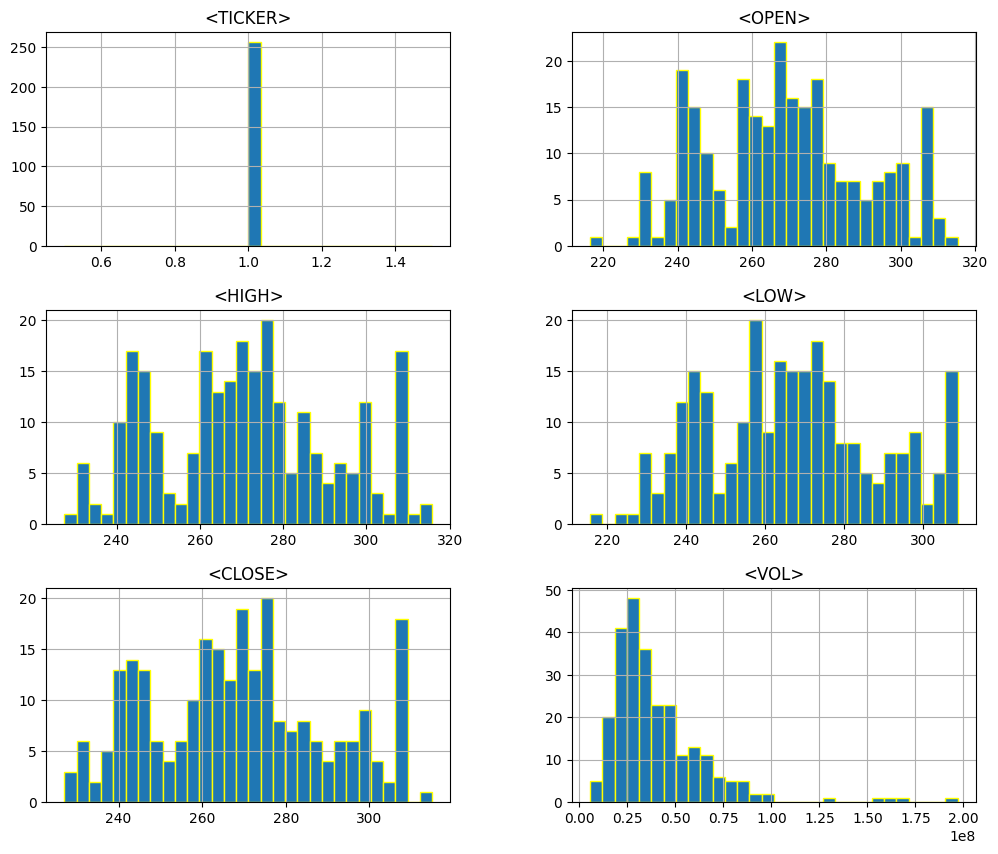

In [62]:
data['<TICKER>']=1
data.hist(bins=30, figsize=(12, 10), edgecolor="yellow")

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  256 non-null    int64  
 1   <PER>     256 non-null    object 
 2   <DATE>    256 non-null    object 
 3   <TIME>    256 non-null    object 
 4   <OPEN>    256 non-null    float64
 5   <HIGH>    256 non-null    float64
 6   <LOW>     256 non-null    float64
 7   <CLOSE>   256 non-null    float64
 8   <VOL>     256 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 18.1+ KB


array([[<Axes: title={'center': '<OPEN>'}>]], dtype=object)

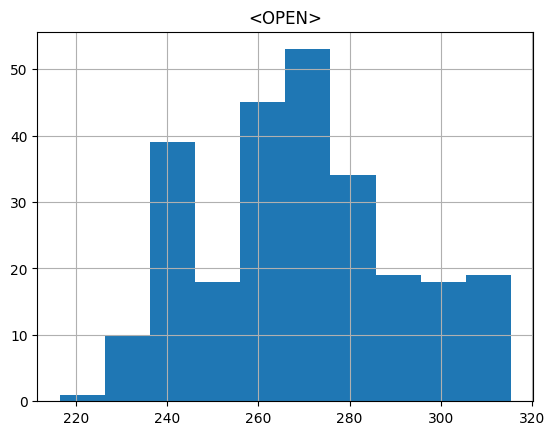

In [64]:
import numpy as np
data.hist('<OPEN>')

array([[<Axes: title={'center': '<TICKER>'}>,
        <Axes: title={'center': '<TIME>'}>,
        <Axes: title={'center': '<OPEN>'}>],
       [<Axes: title={'center': '<HIGH>'}>,
        <Axes: title={'center': '<LOW>'}>,
        <Axes: title={'center': '<CLOSE>'}>],
       [<Axes: title={'center': '<VOL>'}>, <Axes: >, <Axes: >]],
      dtype=object)

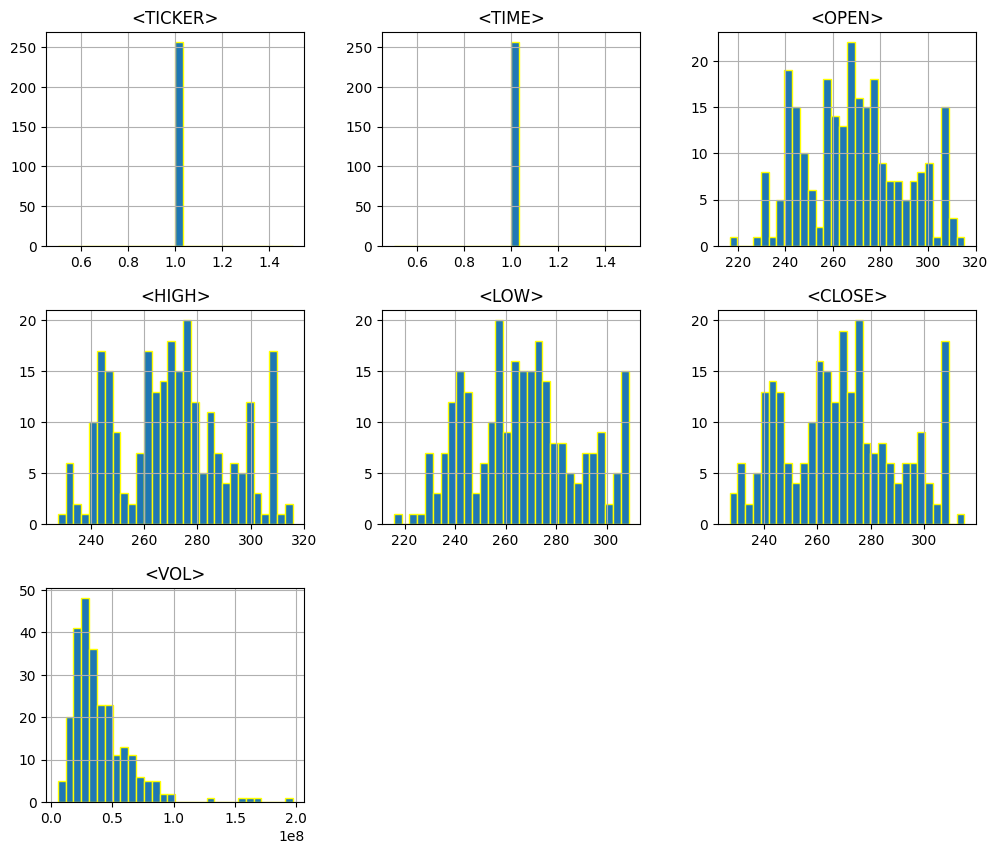

In [65]:
#import numpy as np
data['<TIME>']=1
#data = np.log(data)
data.hist(bins=30, figsize=(12, 10), edgecolor="yellow")

In [66]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'data' is your DataFrame containing both numerical and categorical features
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# One-hot encode categorical features
ct = ColumnTransformer(
    [('onehot', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)
data_encoded = ct.fit_transform(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['<OPEN>'], random_state=44, test_size=.2)

# Train the Linear Regression model
select = LinearRegression()
select.fit(X_train, y_train)

# Print the training and testing scores
print("Training score:", select.score(X_train, y_train))
print("Testing score:", select.score(X_test, y_test))


Training score: 0.994138805840391
Testing score: 0.9954965349338273


In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_predicted = select.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
print('Root mean squared error: ', rmse) # среднеквадратичная ошибка

Root mean squared error:  60.52840000000046


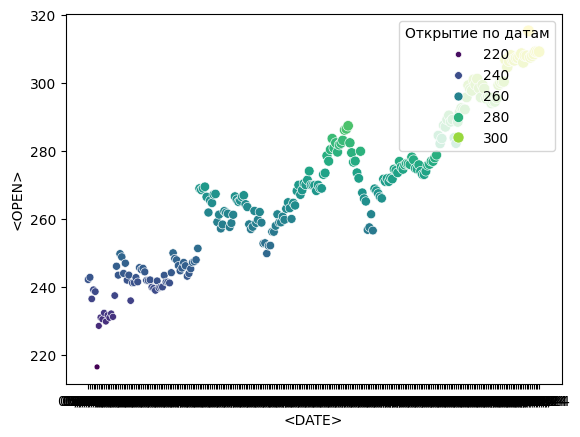

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=data, x="<DATE>",
                 y="<OPEN>",size="<OPEN>",
               hue="<OPEN>", palette="viridis")
plt.legend(title="Открытие по датам", loc="upper right")
plt.show()

In [76]:
# Verify data shapes before training classifiers
print("Shapes of training data:")
print("x_train:", x_train.shape)
print("y_train_classes:", y_train_classes.shape)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train_classes)
print("Accuracy on training set (KNN): {:.3f}".format(knn.score(x_train, y_train_classes)))
print("Accuracy on test set (KNN): {:.3f}".format(knn.score(x_test, y_test_classes)))

# Train Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train_classes)
print("Accuracy on training set (Decision Tree): {:.3f}".format(tree.score(x_train, y_train_classes)))
print("Accuracy on test set (Decision Tree): {:.3f}".format(tree.score(x_test, y_test_classes)))

Shapes of training data:
x_train: (192, 9)
y_train_classes: (204,)


ValueError: Found input variables with inconsistent numbers of samples: [192, 204]

In [77]:
import pandas as pd
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_regression

selector = GenericUnivariateSelect(score_func=mutual_info_regression, mode='k_best', param=1)
selector.fit(x_train, y_train)
pd.DataFrame(data={'score':selector.scores_,
                   'support':selector.get_support()},
             index=x_train.columns).sort_values(by='score', ascending=False)

,score,support
<OPEN>,3.989223,True
<HIGH>,2.484340,False
<LOW>,2.454143,False
<CLOSE>,2.036536,False
<VOL>,0.149122,False
<TICKER>,0.000000,False
<PER>,0.000000,False
<DATE>,0.000000,False
<TIME>,0.000000,False
